In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [41]:
df = pd.read_csv(
    './train_data.csv',
    low_memory=False
)
display(df)

submission = pd.read_csv(
    './submission_data.csv',
    low_memory=False
)

display(submission)

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,['IND_C3B6'],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,"['IND_1590', 'IND_ECAC']",-1.000000,1.023562,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,['IND_B2EF'],1.893333,1.008039,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,['IND_BAFB'],1.000000,1.253186,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,['IND_3F31'],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118912,BRAND_2058,2.074438,2.058055,BRAND_2058_COUNTRY_C8F4,CORP_3C9A,COUNTRY_C8F4,2020-11-01,2022-12-01,DRUG_ID_74A6,-1,['IND_A496'],-1.000000,1.049808,0.095233,1.054007,1.100336,2.029851,THER_AREA_6CEE,1.203657
118913,BRAND_4888,1.756234,1.819485,BRAND_4888_COUNTRY_6F78,CORP_A713,COUNTRY_6F78,2019-07-01,2022-12-01,DRUG_ID_52A5,-1,['IND_617C'],1.173333,1.008985,0.033939,1.008317,1.029630,1.955224,THER_AREA_980E,1.109272
118914,BRAND_0056,1.127497,1.491552,BRAND_0056_COUNTRY_0C7D,CORP_01C7,COUNTRY_0C7D,2018-09-01,2022-12-01,DRUG_ID_D637,-1,['IND_FC21'],1.826667,1.121505,0.012526,1.017259,1.018310,1.926795,THER_AREA_644A,1.343341
118915,BRAND_6200,1.874532,2.020277,BRAND_6200_COUNTRY_89F9,CORP_39F7,COUNTRY_89F9,2020-09-01,2022-12-01,DRUG_ID_B0E9,2020-11-01 00:00:00,['IND_B2EF'],-1.000000,1.520144,0.001334,1.960978,2.490911,1.985847,THER_AREA_96D7,1.266831


,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_E57A,2.079046,1.467920,BRAND_E57A_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-02-01,2023-01-01,DRUG_ID_FADD,2022-08-01 00:00:00,['IND_C3B6'],1.000000,1.004739,0.036647,1.007091,1.012037,1.910448,THER_AREA_980E,NaN
1,BRAND_014B,2.079046,1.467920,BRAND_014B_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-09-01,2023-01-01,DRUG_ID_E07F,-1,['IND_A496'],1.000000,1.004739,0.106925,-1.000000,1.121625,1.910448,THER_AREA_6CEE,NaN
2,BRAND_1E6F,1.018268,1.108030,BRAND_1E6F_COUNTRY_4647,CORP_01C7,COUNTRY_4647,2022-05-01,2023-01-01,DRUG_ID_1A21,2022-06-01 00:00:00,"['IND_120F', 'IND_8E8D']",1.226667,3.243906,0.041152,-1.000000,1.005001,1.567164,THER_AREA_CD59,NaN
3,BRAND_9259,1.190075,1.515375,BRAND_9259_COUNTRY_FA79,CORP_01C7,COUNTRY_FA79,2022-12-01,2023-01-01,DRUG_ID_1315,-1,['IND_BAFB'],1.785253,1.042681,0.002766,-1.000000,1.271214,1.786265,THER_AREA_6CEE,NaN
4,BRAND_106A,1.018876,1.127864,BRAND_106A_COUNTRY_E319,CORP_DF1B,COUNTRY_E319,2022-12-01,2023-01-01,DRUG_ID_2832,2020-03-01 00:00:00,['IND_5586'],1.076762,1.881992,0.000133,-1.000000,2.073953,1.223881,THER_AREA_96D7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,BRAND_740F,2.709582,2.011926,BRAND_740F_COUNTRY_3AD0,CORP_01C7,COUNTRY_3AD0,2022-01-01,2023-12-01,DRUG_ID_C6D4,2022-08-01 00:00:00,['IND_C3B6'],1.573333,1.035514,0.027732,1.005218,1.020516,1.283582,THER_AREA_980E,NaN
1765,BRAND_056A,1.982740,1.915414,BRAND_056A_COUNTRY_4442,CORP_01C7,COUNTRY_4442,2022-09-01,2023-12-01,DRUG_ID_EC3A,2022-09-01 00:00:00,['IND_BAFB'],1.000000,1.179866,0.001275,1.248093,1.337647,1.837175,THER_AREA_96D7,NaN
1766,BRAND_F649,1.186954,1.493446,BRAND_F649_COUNTRY_9488,CORP_01C7,COUNTRY_9488,2023-11-01,2023-12-01,DRUG_ID_20C2,2024-11-01 00:00:00,['IND_F338'],1.815246,1.275586,0.007327,1.196712,1.287604,1.801799,THER_AREA_96D7,NaN
1767,BRAND_DB5A,1.186954,1.493446,BRAND_DB5A_COUNTRY_9488,CORP_01C7,COUNTRY_9488,2023-11-01,2023-12-01,DRUG_ID_2910,2024-11-01 00:00:00,['IND_F258'],1.815246,1.275586,0.527445,1.091414,1.604256,1.801799,THER_AREA_644A,NaN


In [42]:
# Step 1: Create a set of unique `drug_id` values for each country
country_drugs = df.groupby('country')['drug_id'].apply(set).reset_index()

# Step 2: Create a mapping of `drug_id` to all countries it exists in
drug_to_countries = df.groupby('drug_id')['country'].apply(set)

# Step 3: Add a new column indicating whether the `drug_id` exists in other countries
df['drug_in_other_countries'] = df.apply(
    lambda row: len(drug_to_countries[row['drug_id']] - {row['country']}) > 0, axis=1
)

In [43]:
# Step 1: Get the list of countries from the 'submission' DataFrame
submission_countries = submission['country'].unique().tolist()

# Step 2: Filter 'df' based on whether 'country' exists in the list from 'submission'
filtered_df = df[df['country'].isin(submission_countries)]

print(submission_countries)

['COUNTRY_06E4', 'COUNTRY_4647', 'COUNTRY_FA79', 'COUNTRY_E319', 'COUNTRY_907E', 'COUNTRY_2E65', 'COUNTRY_C89B', 'COUNTRY_8B47', 'COUNTRY_0309', 'COUNTRY_6F78', 'COUNTRY_4D48', 'COUNTRY_AE54', 'COUNTRY_D8B0', 'COUNTRY_5180', 'COUNTRY_6C16', 'COUNTRY_89F9', 'COUNTRY_88A3', 'COUNTRY_C8F4', 'COUNTRY_EA71', 'COUNTRY_C51E', 'COUNTRY_5FEB', 'COUNTRY_9488', 'COUNTRY_0C7D', 'COUNTRY_4253', 'COUNTRY_458E', 'COUNTRY_1033', 'COUNTRY_6B71', 'COUNTRY_84C8', 'COUNTRY_3536', 'COUNTRY_9891', 'COUNTRY_53A5', 'COUNTRY_B6AE', 'COUNTRY_4442', 'COUNTRY_445D', 'COUNTRY_3AD0', 'COUNTRY_A67D', 'COUNTRY_D5B9', 'COUNTRY_4242', 'COUNTRY_5A54', 'COUNTRY_7D31', 'COUNTRY_1007', 'COUNTRY_F78A', 'COUNTRY_221C', 'COUNTRY_77DA', 'COUNTRY_EF33', 'COUNTRY_3F0E', 'COUNTRY_8DBB']


In [44]:
display(filtered_df)
df = filtered_df

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,drug_in_other_countries
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,['IND_C3B6'],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784,True
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,"['IND_1590', 'IND_ECAC']",-1.000000,1.023562,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000,True
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,['IND_B2EF'],1.893333,1.008039,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258,True
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,['IND_BAFB'],1.000000,1.253186,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761,True
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,['IND_3F31'],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118912,BRAND_2058,2.074438,2.058055,BRAND_2058_COUNTRY_C8F4,CORP_3C9A,COUNTRY_C8F4,2020-11-01,2022-12-01,DRUG_ID_74A6,-1,['IND_A496'],-1.000000,1.049808,0.095233,1.054007,1.100336,2.029851,THER_AREA_6CEE,1.203657,True
118913,BRAND_4888,1.756234,1.819485,BRAND_4888_COUNTRY_6F78,CORP_A713,COUNTRY_6F78,2019-07-01,2022-12-01,DRUG_ID_52A5,-1,['IND_617C'],1.173333,1.008985,0.033939,1.008317,1.029630,1.955224,THER_AREA_980E,1.109272,True
118914,BRAND_0056,1.127497,1.491552,BRAND_0056_COUNTRY_0C7D,CORP_01C7,COUNTRY_0C7D,2018-09-01,2022-12-01,DRUG_ID_D637,-1,['IND_FC21'],1.826667,1.121505,0.012526,1.017259,1.018310,1.926795,THER_AREA_644A,1.343341,True
118915,BRAND_6200,1.874532,2.020277,BRAND_6200_COUNTRY_89F9,CORP_39F7,COUNTRY_89F9,2020-09-01,2022-12-01,DRUG_ID_B0E9,2020-11-01 00:00:00,['IND_B2EF'],-1.000000,1.520144,0.001334,1.960978,2.490911,1.985847,THER_AREA_96D7,1.266831,True


In [45]:
print(drug_to_countries)

drug_id
DRUG_ID_0259    {COUNTRY_445D, COUNTRY_4D48, COUNTRY_C8F4, COU...
DRUG_ID_026E                                       {COUNTRY_0C7D}
DRUG_ID_032B    {COUNTRY_D8B0, COUNTRY_907E, COUNTRY_9891, COU...
DRUG_ID_0383    {COUNTRY_9488, COUNTRY_907E, COUNTRY_4D48, COU...
DRUG_ID_0424                                       {COUNTRY_EA71}
                                      ...                        
DRUG_ID_FADD    {COUNTRY_06E4, COUNTRY_D8B0, COUNTRY_4D48, COU...
DRUG_ID_FAE7                                       {COUNTRY_53A5}
DRUG_ID_FD54           {COUNTRY_5FEB, COUNTRY_4D48, COUNTRY_B6AE}
DRUG_ID_FD89                                       {COUNTRY_1033}
DRUG_ID_FDD8    {COUNTRY_221C, COUNTRY_C89B, COUNTRY_4253, COU...
Name: country, Length: 257, dtype: object


In [46]:
label_encoder = LabelEncoder()

# Apply label encoding to therapeutic_area
df['therapeutic_area_encoded'] = label_encoder.fit_transform(df['therapeutic_area'])

# View the mapping
print("Therapeutic Area Mapping:")
for class_name, class_code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{class_name} -> {class_code}")

Therapeutic Area Mapping:
THER_AREA_032C -> 0
THER_AREA_051D -> 1
THER_AREA_22ED -> 2
THER_AREA_4BA5 -> 3
THER_AREA_644A -> 4
THER_AREA_645F -> 5
THER_AREA_66C5 -> 6
THER_AREA_6CEE -> 7
THER_AREA_8E53 -> 8
THER_AREA_96D7 -> 9
THER_AREA_980E -> 10
THER_AREA_CD59 -> 11


In [47]:
# Define the feature set
features = ['che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 'prev_perc', 'public_perc_che', 'therapeutic_area_encoded', 'target', 'population']

df_features = df[features]
df_features

,che_pc_usd,che_perc_gdp,insurance_perc_che,prev_perc,public_perc_che,therapeutic_area_encoded,target,population
0,1.209114,1.665879,1.893333,0.028367,1.835821,10,1.000784,1.008039
1,-1.000000,-1.000000,-1.000000,0.000047,-1.000000,9,1.000000,1.023562
2,1.209114,1.665879,1.893333,0.001502,1.835821,9,1.002258,1.008039
3,1.851280,2.051770,1.000000,0.001304,1.805970,7,1.068761,1.253186
4,1.791199,2.059130,2.013333,0.054467,1.880597,7,1.036312,1.639352
...,...,...,...,...,...,...,...,...
118912,2.074438,2.058055,-1.000000,0.095233,2.029851,7,1.203657,1.049808
118913,1.756234,1.819485,1.173333,0.033939,1.955224,10,1.109272,1.008985
118914,1.127497,1.491552,1.826667,0.012526,1.926795,4,1.343341,1.121505
118915,1.874532,2.020277,-1.000000,0.001334,1.985847,9,1.266831,1.520144


# KMean Clustering

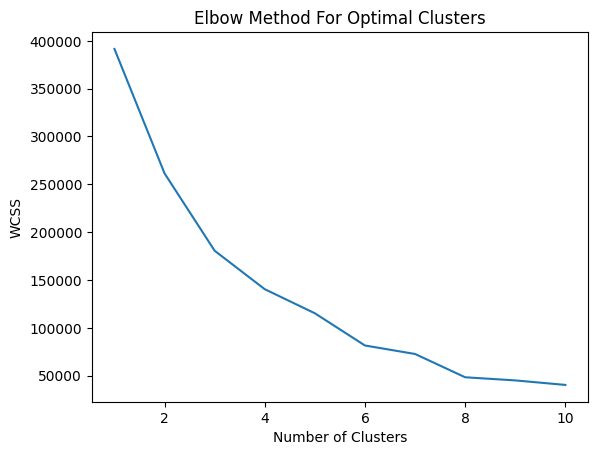

In [49]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

pca = PCA(n_components=2)  # Reduce to 2 components
df_pca = pca.fit_transform(df_scaled)

# --- Elbow Method --- #
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot the Elbow Method result
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


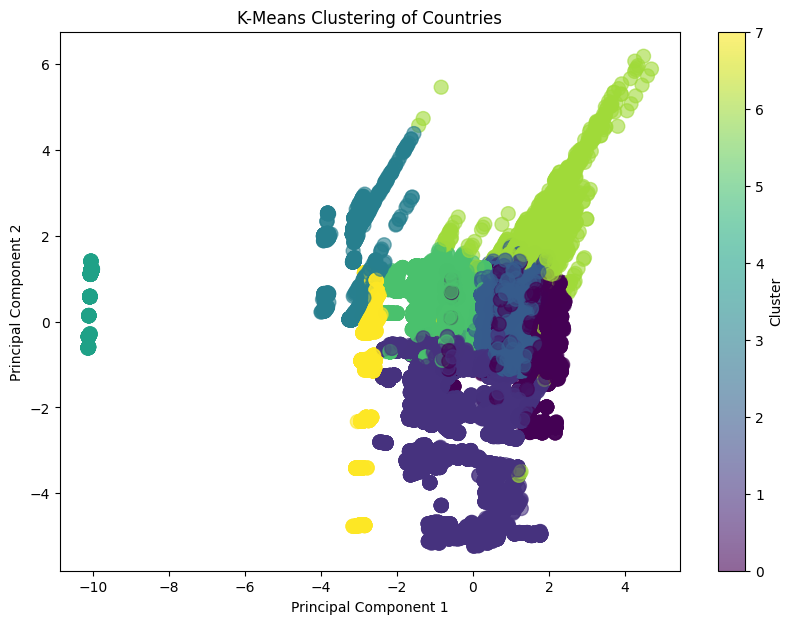

In [50]:
kmeans = KMeans(n_clusters=8, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', s=100, alpha=0.6)
plt.title('K-Means Clustering of Countries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Optionally, label the points with country names
# for i, country in enumerate(df['country']):
#     plt.text(df_pca[i, 0], df_pca[i, 1], country, fontsize=9)

plt.colorbar(label='Cluster')
plt.show()

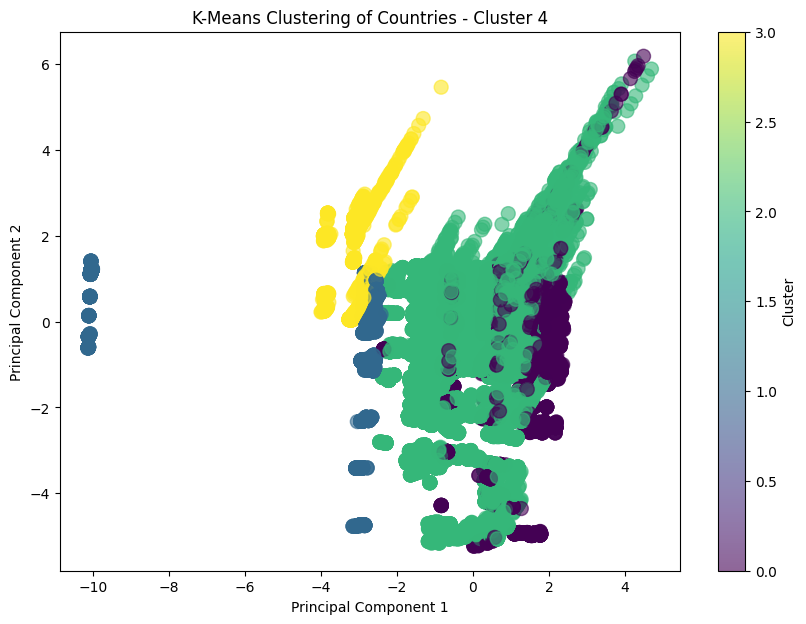

In [51]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', s=100, alpha=0.6)
plt.title('K-Means Clustering of Countries - Cluster 4')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Optionally, label the points with country names
# for i, country in enumerate(df['country']):
#     plt.text(df_pca[i, 0], df_pca[i, 1], country, fontsize=9)

plt.colorbar(label='Cluster')
plt.show()

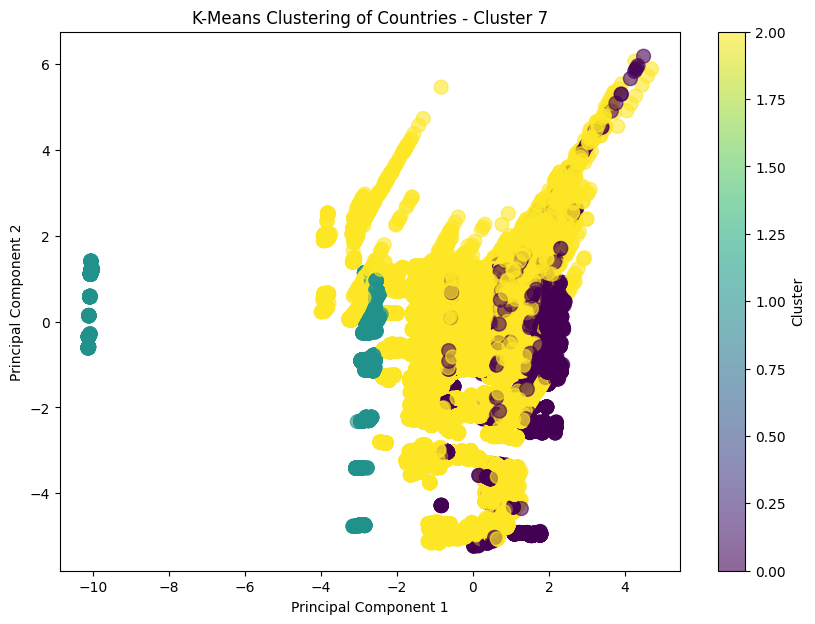

In [64]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', s=100, alpha=0.6)
plt.title('K-Means Clustering of Countries - Cluster 7')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.colorbar(label='Cluster')
plt.show()

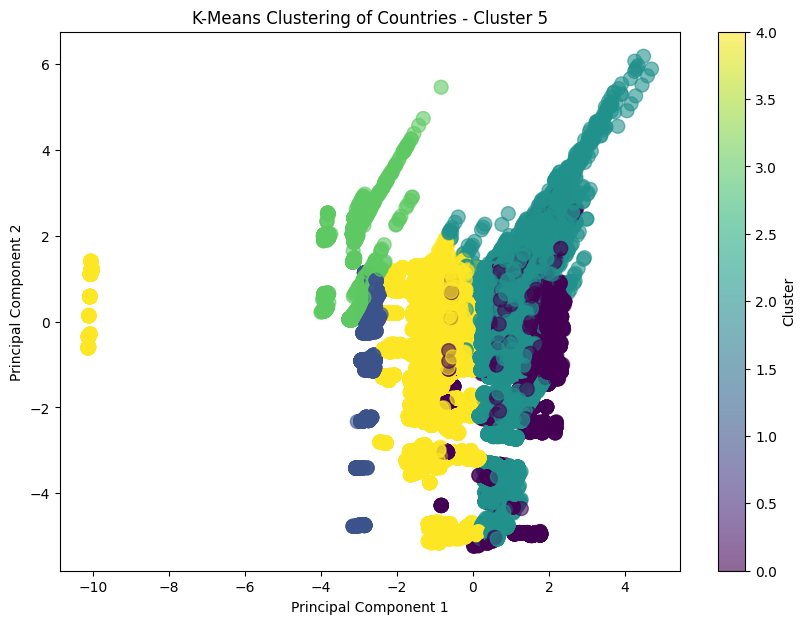

In [53]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', s=100, alpha=0.6)
plt.title('K-Means Clustering of Countries - Cluster 5')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Optionally, label the points with country names
# for i, country in enumerate(df['country']):
#     plt.text(df_pca[i, 0], df_pca[i, 1], country, fontsize=9)

plt.colorbar(label='Cluster')
plt.show()

# Density - DBScan

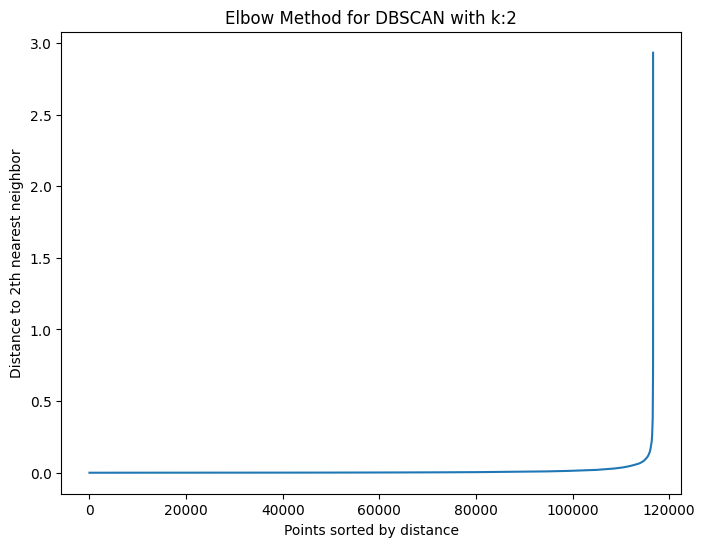

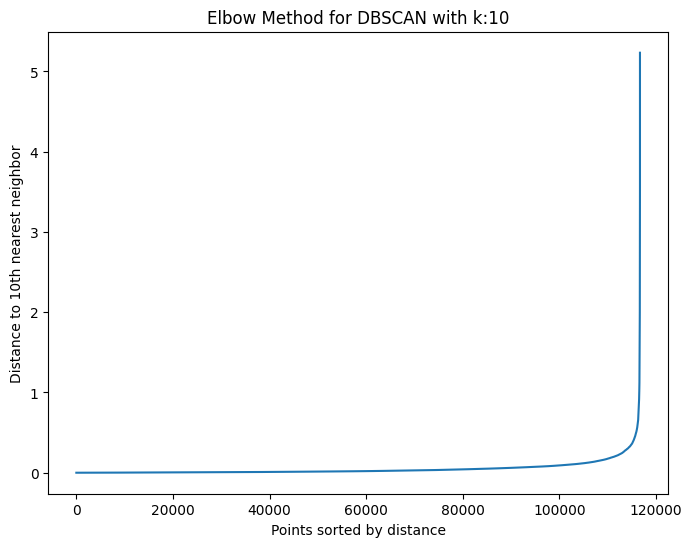

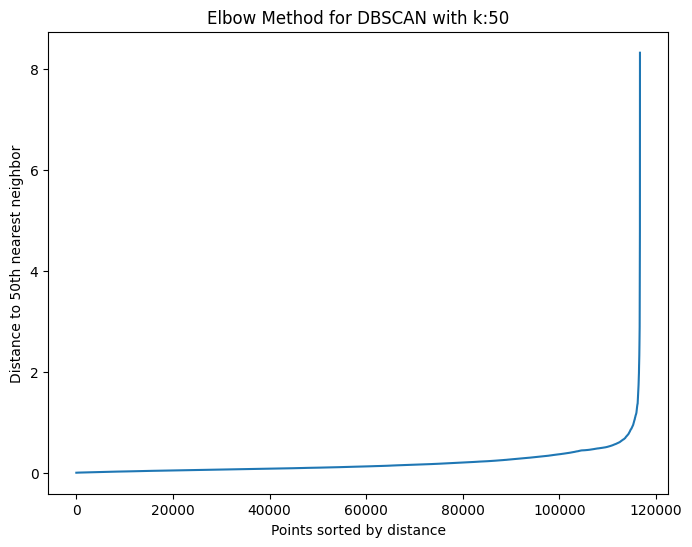

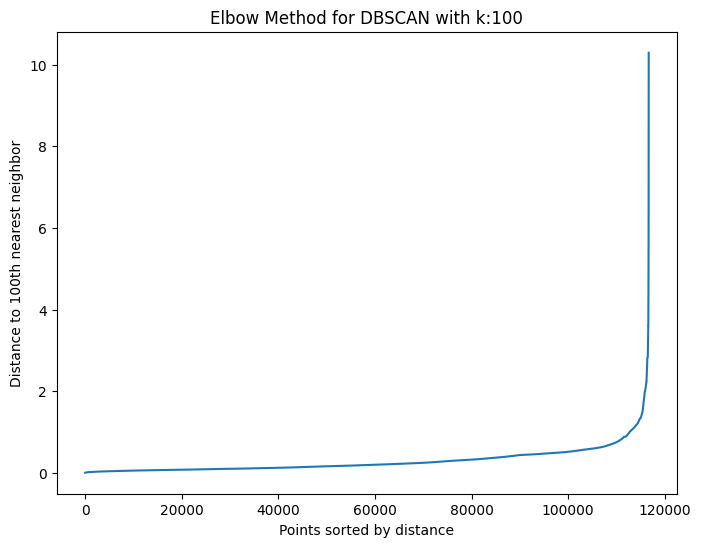

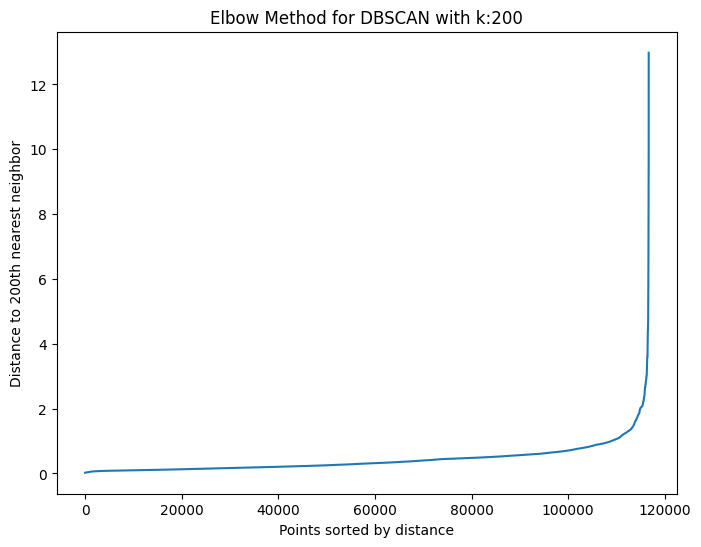

In [54]:
# Handle missing values (optional)
df_features = df_features.dropna()

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# --- Elbow Method for DBSCAN: Nearest Neighbors Distance --- #
# Use NearestNeighbors to calculate distances between points

for k in [2, 10, 50, 100, 200]:
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(df_scaled)
    distances, indices = neighbors_fit.kneighbors(df_scaled)
    
    # Sort the distances in ascending order
    distances = np.sort(distances[:, k-1], axis=0)
    
    # Plot the distances
    plt.figure(figsize=(8, 6))
    plt.plot(distances)
    plt.title(f'Elbow Method for DBSCAN with k:{k}')
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'Distance to {k}th nearest neighbor')
    plt.show()

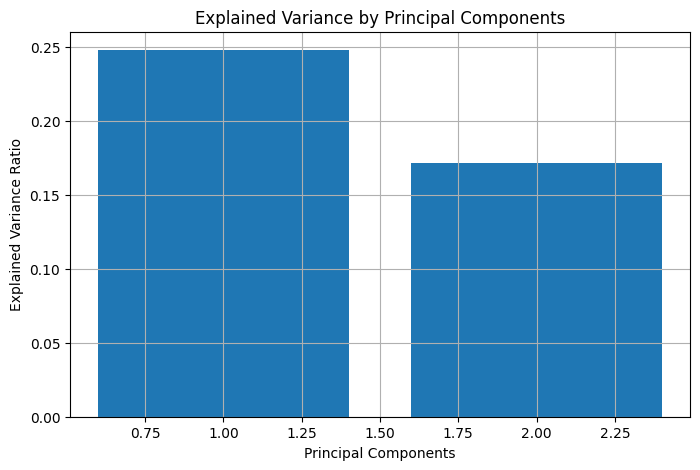

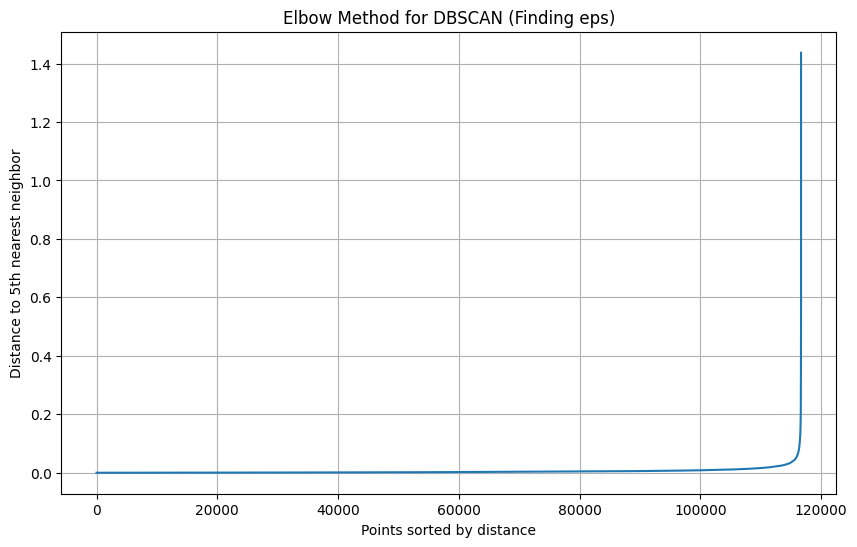

In [55]:
df_features = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Step 2: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
df_pca = pca.fit_transform(df_scaled)

# Visualize the explained variance ratio to understand how much variance is retained in each component
plt.figure(figsize=(8, 5))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Step 3: Use Nearest Neighbors to find the optimal 'eps' for DBSCAN
k = 5  # Typically, k=5 or k=10 for DBSCAN
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Sort the distances to get the distance of the k-th nearest neighbors
distances = np.sort(distances[:, k-1], axis=0)

# Plot the sorted distances to find the elbow (sharp increase)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Elbow Method for DBSCAN (Finding eps)')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.grid(True)
plt.show()

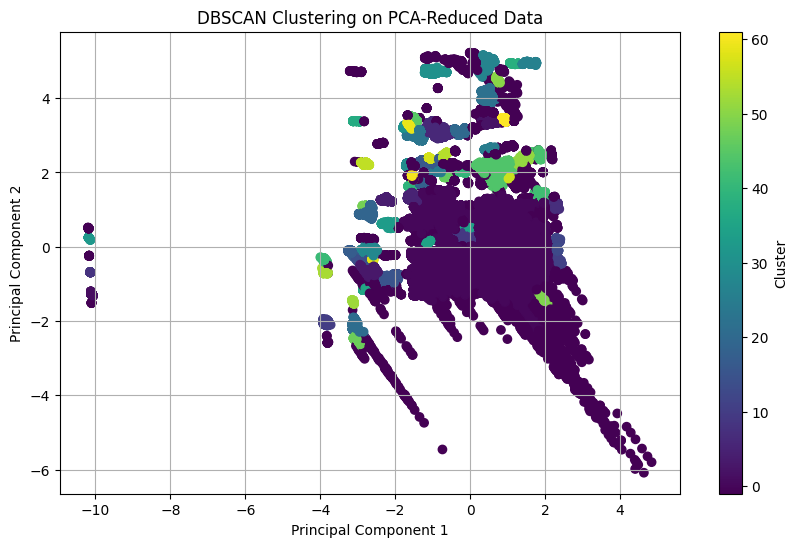

        country  cluster
0  COUNTRY_88A3        0
1  COUNTRY_8B47        1
2  COUNTRY_88A3        0
3  COUNTRY_445D        0
4  COUNTRY_D8B0        0


In [58]:
eps_value = 0.1
min_samples_value = 50 

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df['cluster'] = dbscan.fit_predict(df_pca)

# Step 5: Visualize the clustering result on the 2D PCA components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display the clustering results
print(df[['country', 'cluster']].head())

# Tree - Algomerative

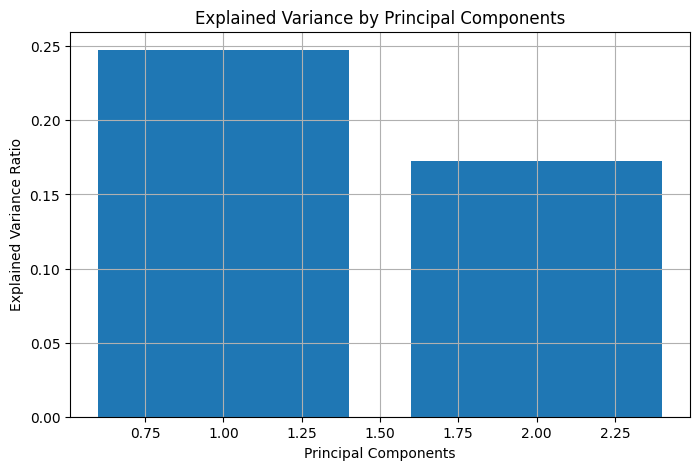

In [ ]:
df_features = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Step 2: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
df_pca = pca.fit_transform(df_scaled)

# Visualize the explained variance ratio to understand how much variance is retained in each component
plt.figure(figsize=(8, 5))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Step 3: Create a Dendrogram to determine the optimal number of clusters
Z = linkage(df_pca, 'ward')  # Perform hierarchical clustering using Ward linkage

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [57]:
df_features = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)
y_train = np.random.randint(0, 2, size=X_train.shape[0])  # Random binary target for feature importance

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
# Create a DataFrame to pair the features with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
display(feature_importance_df)

,Feature,Importance
0,che_pc_usd,0.021010
1,che_perc_gdp,0.021274
2,insurance_perc_che,0.010036
3,prev_perc,0.096321
4,public_perc_che,0.013607
5,therapeutic_area_encoded,0.025368
6,target,0.789955
7,population,0.022428


In [58]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Sort features by importance and select the top N (e.g., 5 most important)
important_features_idx = np.argsort(feature_importances)[::-1][:]
important_features = np.array(features)[important_features_idx]

In [59]:
df_selected_features = df[important_features]
df_scaled_selected = scaler.fit_transform(df_selected_features)

# PCA to reduce the data to 2 components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled_selected)

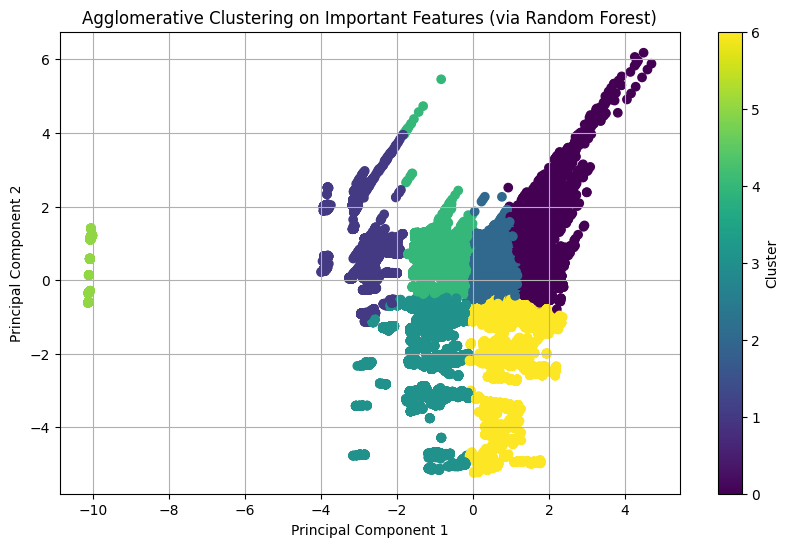

        country  cluster
0  COUNTRY_88A3        4
1  COUNTRY_8B47        5
2  COUNTRY_88A3        4
3  COUNTRY_445D        2
4  COUNTRY_D8B0        2


In [73]:
clustering = KMeans(n_clusters=7, random_state=42)
df['cluster'] = clustering.fit_predict(df_pca)

# Step 6: Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Agglomerative Clustering on Important Features (via Random Forest)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display the clustering results
print(df[['country', 'cluster']].head())

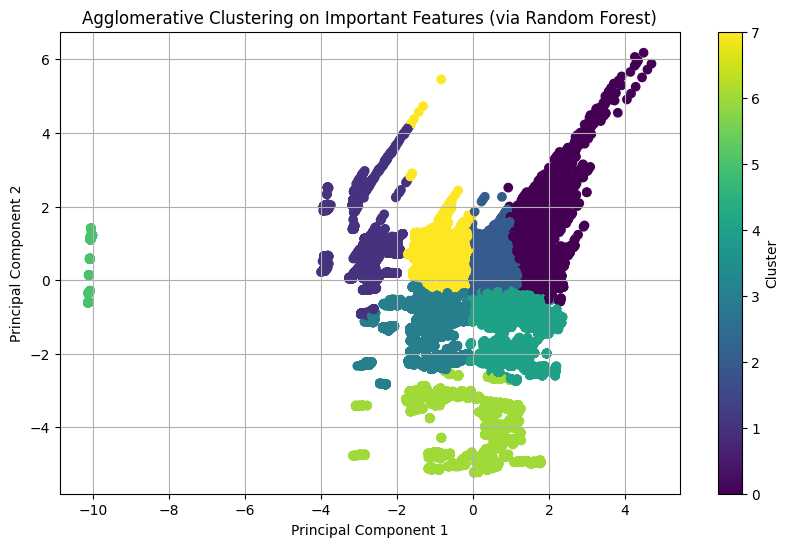

        country  cluster
0  COUNTRY_88A3        7
1  COUNTRY_8B47        5
2  COUNTRY_88A3        7
3  COUNTRY_445D        2
4  COUNTRY_D8B0        4


In [72]:
clustering = KMeans(n_clusters=8, random_state=42)
df['cluster'] = clustering.fit_predict(df_pca)

# Step 6: Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Agglomerative Clustering on Important Features (via Random Forest)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display the clustering results
print(df[['country', 'cluster']].head())

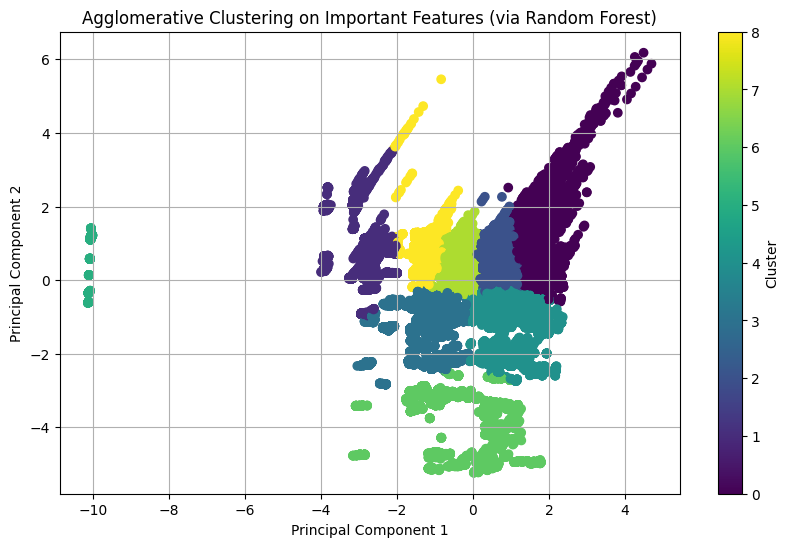

        country  cluster
0  COUNTRY_88A3        7
1  COUNTRY_8B47        5
2  COUNTRY_88A3        7
3  COUNTRY_445D        2
4  COUNTRY_D8B0        4


In [74]:
clustering = KMeans(n_clusters=9, random_state=42)
df['cluster'] = clustering.fit_predict(df_pca)

# Step 6: Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Agglomerative Clustering on Important Features (via Random Forest)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display the clustering results
print(df[['country', 'cluster']].head())

# Began Clustering With K-Mean 7

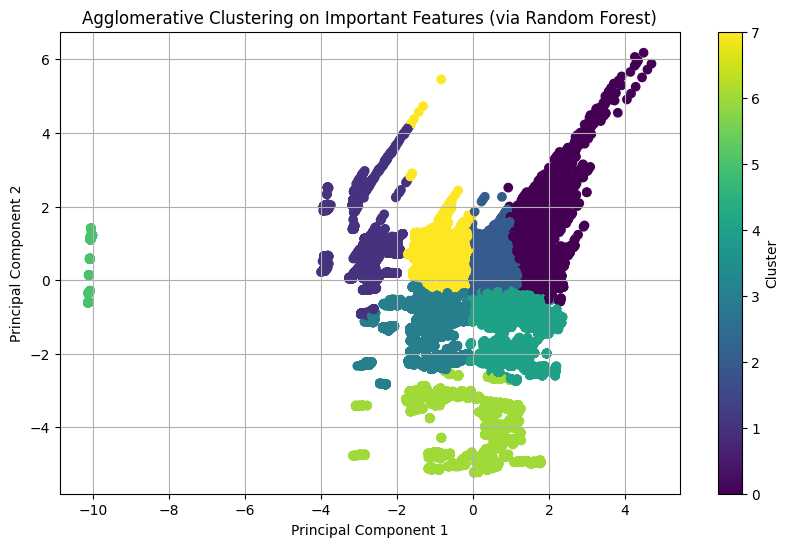

        country  cluster
0  COUNTRY_88A3        7
1  COUNTRY_8B47        5
2  COUNTRY_88A3        7
3  COUNTRY_445D        2
4  COUNTRY_D8B0        4


In [78]:
n=8
df_features = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)
y_train = np.random.randint(0, 2, size=X_train.shape[0])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Sort features by importance and select the top N (e.g., 5 most important)
important_features_idx = np.argsort(feature_importances)[::-1][:]
important_features = np.array(features)[important_features_idx]

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

df_selected_features = df[important_features]
df_scaled_selected = scaler.fit_transform(df_selected_features)

# PCA to reduce the data to 2 components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled_selected)

clustering = KMeans(n_clusters=n, random_state=42)
df['cluster'] = clustering.fit_predict(df_pca)

# Step 6: Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Agglomerative Clustering on Important Features (via Random Forest)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display the clustering results
print(df[['country', 'cluster']].head())

In [79]:
df

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,drug_in_other_countries,therapeutic_area_encoded,cluster
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,...,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784,True,10,7
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,...,1.023562,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000,True,9,5
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,...,1.008039,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258,True,9,7
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,...,1.253186,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761,True,7,2
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,...,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118912,BRAND_2058,2.074438,2.058055,BRAND_2058_COUNTRY_C8F4,CORP_3C9A,COUNTRY_C8F4,2020-11-01,2022-12-01,DRUG_ID_74A6,-1,...,1.049808,0.095233,1.054007,1.100336,2.029851,THER_AREA_6CEE,1.203657,True,7,4
118913,BRAND_4888,1.756234,1.819485,BRAND_4888_COUNTRY_6F78,CORP_A713,COUNTRY_6F78,2019-07-01,2022-12-01,DRUG_ID_52A5,-1,...,1.008985,0.033939,1.008317,1.029630,1.955224,THER_AREA_980E,1.109272,True,10,2
118914,BRAND_0056,1.127497,1.491552,BRAND_0056_COUNTRY_0C7D,CORP_01C7,COUNTRY_0C7D,2018-09-01,2022-12-01,DRUG_ID_D637,-1,...,1.121505,0.012526,1.017259,1.018310,1.926795,THER_AREA_644A,1.343341,True,4,3
118915,BRAND_6200,1.874532,2.020277,BRAND_6200_COUNTRY_89F9,CORP_39F7,COUNTRY_89F9,2020-09-01,2022-12-01,DRUG_ID_B0E9,2020-11-01 00:00:00,...,1.520144,0.001334,1.960978,2.490911,1.985847,THER_AREA_96D7,1.266831,True,9,0


In [81]:
for i in range(n):
    cluster_df = df[df['cluster'] == i]
    
    # Save each cluster as a separate CSV file
    cluster_df.drop('cluster', axis=1, inplace=True)
    cluster_df.to_csv(f'kmean_{i+1}.csv', index=False)

    print(f"Cluster {i+1} saved as 'kmean_{i+1}.csv'")

/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_2536/230472256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.drop('cluster', axis=1, inplace=True)
/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_2536/230472256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.drop('cluster', axis=1, inplace=True)
/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_2536/230472256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Cluster 1 saved as 'kmean_1.csv'
Cluster 2 saved as 'kmean_2.csv'
Cluster 3 saved as 'kmean_3.csv'
Cluster 4 saved as 'kmean_4.csv'


/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_2536/230472256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.drop('cluster', axis=1, inplace=True)
/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_2536/230472256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.drop('cluster', axis=1, inplace=True)


Cluster 5 saved as 'kmean_5.csv'
Cluster 6 saved as 'kmean_6.csv'
Cluster 7 saved as 'kmean_7.csv'


/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_2536/230472256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.drop('cluster', axis=1, inplace=True)
/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_2536/230472256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.drop('cluster', axis=1, inplace=True)
/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_2536/230472256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Cluster 8 saved as 'kmean_8.csv'
